# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**Respuesta:** Ayudaría mucho conocer con que idea se conformó el dataset de datos. Pues de algún modo el dataset es una foto que alguien saco en algún momento de un conjunto de datos con ciertas condiciones implícitas en él. Conocer bajo qué condiciones, bajo que asunciones, como se recolectaron y desde donde se recolectaron los datos serian datos útiles para entender de antemano las características y el sesgo que podrían tener los datos.
De antemano las variables que serian importante apra el analisis serianÑ

+ <strong>La superficie cubierta:</strong> Pues el precio de cualquier propiedad esta en relacion a la superficie cubierta.
+ <strong>La cantidad de habitaciones:</strong> Pues es un indicador de que comodidades tiene la propiedad. Este junto a la superficie cubierta son dos indidcadores que describen estructuralmente a la propiedad.
+ <strong>La zona geografica:</strong> Pues es un dato determinante que incrementa o decrementa el precio de una propiedad. 
+ <strong>Tipo de propiedad</strong>: Por ultimo el tipo de propiedad termina de decirnos de que estamso hablando no es lo mismo tasar una casa de 200 m2 que un departamentode 200 m2.Si bien pueden tener las mismas superficies y comodidades las casas a veces suelen tener un plus en precio


### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
data=pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')


In [3]:
print("Numero de filas:",len(data))
print("Numero de Columnas:", len(data.columns))

Numero de filas: 146660
Numero de Columnas: 19


In [4]:
data.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [5]:
data.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


***Evaluo columnas nulas NaN***

In [6]:
data.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

***Evaluó los mínimos, máximos y media*** para ver la dispersión de los datos

In [7]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [8]:
data['property_type'].unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [9]:
# Agrupo los datos del dataframe por la columna 'Property_type' y cuento sus ocurrencias 
grupo=data.groupby('property_type')['property_type'].count()

# Creo un dataframe con el resultado
grupo2=pd.DataFrame(grupo)
#Renombro la columna de resultado
grupo2=grupo2.rename(columns={"property_type": "values"})
# Lo transpongo para mostrarlo mejor.
cuadro_tipos_propiedades=grupo2.T
cuadro_tipos_propiedades

property_type,Casa,Casa de campo,Cochera,Departamento,Depósito,Local comercial,Lote,Oficina,Otro,PH
values,21521,322,259,107326,265,325,1312,658,374,14298


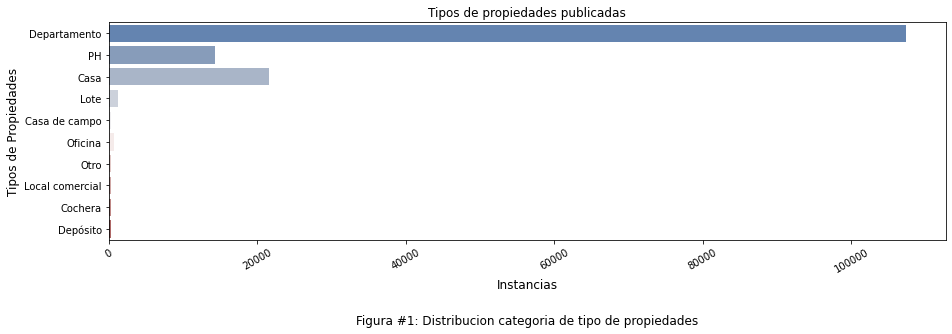

In [10]:

# Seteo la figura del grafico 
f, (ax1) = plt.subplots(figsize=(15, 4), sharex=True)

#Roto las etiquetas del Eje X a 30 grados haci ala derecha para que se vea bien
plt.setp(ax1.get_xticklabels(), rotation=30)

#Seteo el titulo
ax1.set_title("Tipos de propiedades publicadas",fontsize=12)


#Genero el grafico 
ax1=sns.countplot(y="property_type", data=data, palette="vlag" ,ax=ax1)


#Seteo los rotulos de los ejes X e Y
ax1.set_xlabel("Instancias",fontsize=12)
ax1.set_ylabel("Tipos de Propiedades",fontsize=12)
ax1.text(0.5, -0.4, 'Figura #1: Distribucion categoria de tipo de propiedades',horizontalalignment='center',verticalalignment='bottom',fontsize=12, color='black',transform=ax1.transAxes)
plt.show()

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables l2 y l3. Si te animas, puedes hacer los dos gráficos usando subplot de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

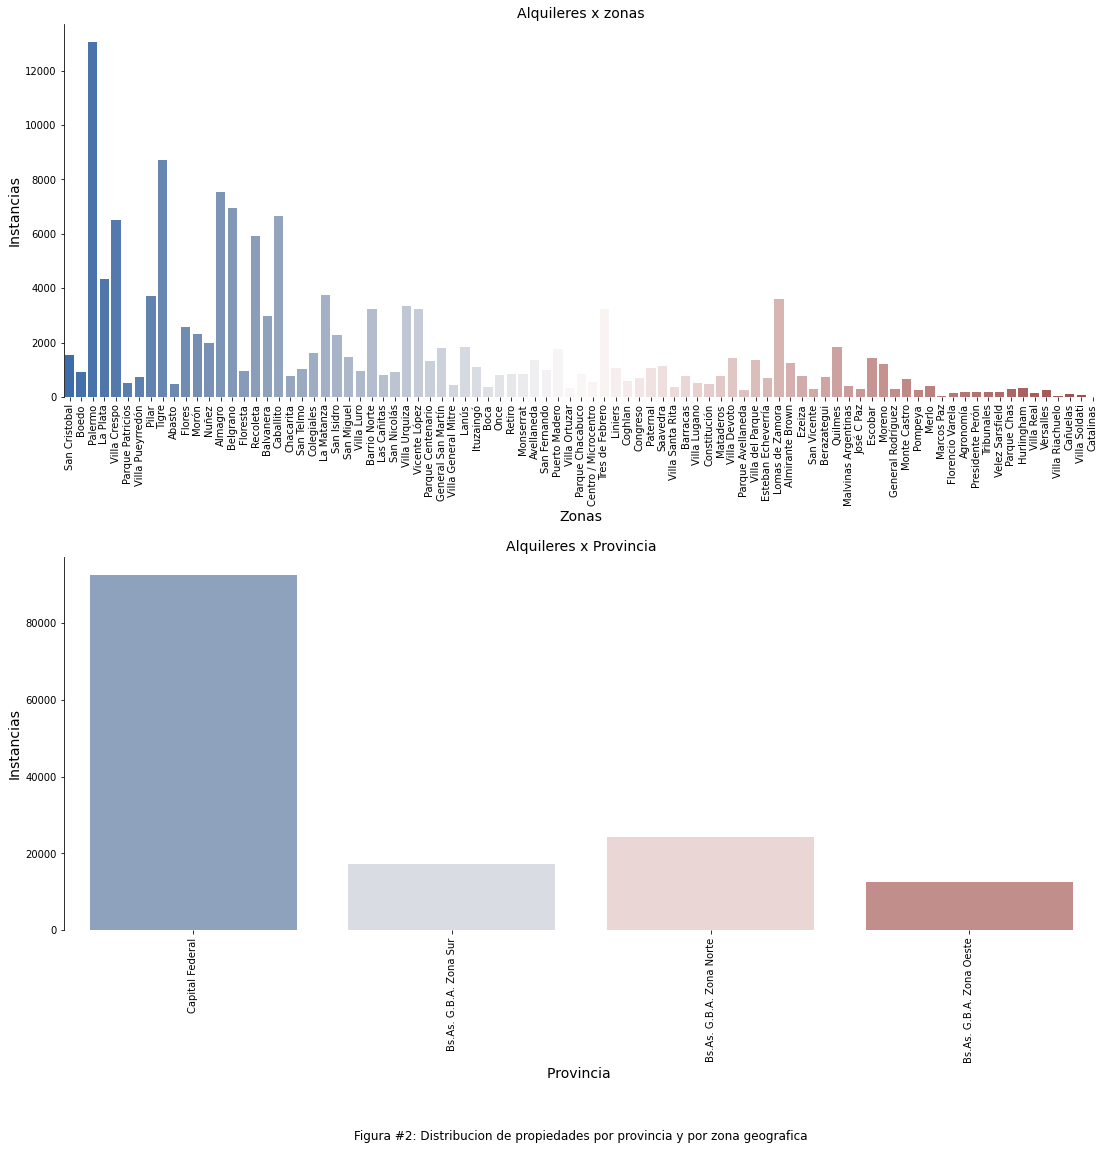

In [11]:
fig = plt.figure(figsize = (30, 15),constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec2[0, 1])
ax2 = fig.add_subplot(spec2[1, 1])
ax1=sns.countplot("l3", data=data, palette="vlag" ,ax=ax1)
ax2=sns.countplot("l2", data=data, palette="vlag" ,ax=ax2)
 

#Roto las etiquetas del Eje X a 30 grados haci ala derecha para que se vea bien
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.setp(ax2.get_xticklabels(), rotation=90)

#Seteo los rotulos de los ejes X e Y
ax2.set_ylabel("Instancias",fontsize=14)
ax2.set_xlabel("Provincia ",fontsize=14)
ax1.set_ylabel("Instancias",fontsize=14)
ax1.set_xlabel("Zonas",fontsize=14)

#Seteo el titulo
ax2.set_title("Alquileres x Provincia",fontsize=14)
ax1.set_title("Alquileres x zonas",fontsize=14)

ax2.text(0.5, -2, 'Figura #2: Distribucion de propiedades por provincia y por zona geografica',horizontalalignment='center',verticalalignment='bottom',fontsize=12, color='black',transform=ax1.transAxes)
#doy el formato final al grafico
sns.despine(bottom=True)



***Analisis de la distribucion de la variables numericas a travez de histogramas de frecuencias***

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [12]:
data_filtrado=data[data.property_type.isin(['Departamento','PH','Casa']) & (data.l2=='Capital Federal')]
res=pd.DataFrame(data_filtrado)
res.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [13]:
res=data_filtrado[['property_type','rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price']].copy()
res.head(2)

,property_type,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Departamento,7.0,7.0,2.0,140.0,140.0,153000.0
1,PH,2.0,1.0,2.0,70.0,58.0,159000.0


In [14]:
# Creo una funcion que me permita imprimir todos los histogramas de frecuecia de las variables numericas 
# para pode utilizarlo al analizar cada tipode propiedad por separado

def grafica_distribucion(data,titulo):
    print(titulo)
    fig2 = plt.figure(figsize = (10, 10),constrained_layout=True)
    spec2 = gridspec.GridSpec(ncols=3, nrows=3, figure=fig2)

    lista_atributos=['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']
    filas=0
    columnas=0
    for atributo in lista_atributos:
        x=data[atributo]
        ax = fig2.add_subplot(spec2[filas,columnas])
        ax=sns.distplot(x,ax=ax)
        
        ax.set_xlabel(atributo,fontsize = 18)
        if columnas<2:
            columnas+=1
        else:
            columnas=0
            filas+=1
   


### Separo y calculo los estadisticos por cada tipo de propiedad

***Analisis del tipo de propiedad "Departamento"***

In [15]:
res[res.property_type=='Departamento'].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,79029.000000,79029.000000,77092.000000,70592.000000,70315.000000,7.902900e+04
mean,2.814600,1.836946,1.533324,98.604091,86.041357,2.597756e+05
std,1.201029,0.972290,0.844190,658.176800,497.058462,3.389683e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,47.000000,43.000000,1.190000e+05
50%,3.000000,2.000000,1.000000,66.000000,60.000000,1.700000e+05
75%,4.000000,2.000000,2.000000,99.000000,87.000000,2.690000e+05
max,21.000000,15.000000,14.000000,108960.000000,104890.000000,3.243423e+07


***Conclusiones property_type='Departamento'*** 
+ <strong>Cantidad eventos:</strong> 107326, representan el 77% de todos los datos del dataset. 
+ <strong>Valores nulos:</strong> Se encuentran valores nulos dentro de la muestra de datos que deberán ser depurados.
+ <strong>Valores máximos y mínimos:</strong> Hay una gran amplitud entre máximo y mínimos. En las graficas de las distribuciones se ve claramente que hay valores máximos muy extremos que deberemos depurar para mejorar el análisis.
+ <strong>Graficas de distribución:</strong> Se ven distribuciones asimétricas negativas debido a los valores máximos extremos
 

***Analisis del tipo de propiedad "PH"***

In [16]:
res[res.property_type=='PH'].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,9764.000000,9764.000000,9676.000000,9722.000000,9691.000000,9.764000e+03
mean,3.638161,2.539021,1.561182,176.362065,130.730472,2.192085e+05
std,1.380147,1.237956,0.790040,2232.295499,1819.098748,1.163025e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,2.700000e+04
25%,3.000000,2.000000,1.000000,70.000000,58.000000,1.350000e+05
50%,3.000000,2.000000,1.000000,105.000000,84.000000,1.915000e+05
75%,4.000000,3.000000,2.000000,152.000000,123.000000,2.700000e+05
max,16.000000,15.000000,11.000000,126062.000000,126062.000000,1.750000e+06


***Conclusiones property_type='PH'*** 
+ <strong>Cantidad eventos:</strong> 14298, representan el 10% de todos los datos del dataset. 
+ <strong>Valores nulos:</strong> Se encuentran valores nulos dentro de la muestra de datos que deberán ser depurados.
+ <strong>Valores máximos y mínimos:</strong> Hay una gran amplitud entre máximo y mínimos. En las gráficas de las distribuciones se ve claramente que hay valores máximos muy extremos que deberemos depurar para mejorar el análisis.
+ <strong>Graficas de distribución:</strong> Se ven distribuciones asimétricas negativas debido a los valores máximos extremos. Aunque no se ven valores tan extremos como en el caso del tipo de e propiedad "Departamentos" en todas las variables. Solo en superficie cubierta y superficie total.


***Analisis del tipo de propiedad "Casa"***

In [17]:
res[res.property_type=='Casa'].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,2692.000000,2692.000000,2546.000000,2254.000000,2244.000000,2.692000e+03
mean,4.914190,3.481798,2.368421,276.877551,220.174688,3.975569e+05
std,1.838235,1.355187,1.156925,351.129170,400.143563,2.869463e+05
min,1.000000,0.000000,1.000000,25.000000,25.000000,3.000000e+04
25%,4.000000,3.000000,2.000000,164.000000,127.000000,2.400000e+05
50%,5.000000,3.000000,2.000000,230.000000,179.000000,3.300000e+05
75%,6.000000,4.000000,3.000000,330.000000,260.000000,4.800000e+05
max,26.000000,15.000000,10.000000,13250.000000,17220.000000,5.000000e+06


***Conclusiones property_type='Casa'*** 
+ <strong>Cantidad eventos:</strong> 14298, representan el 15% de todos los datos del dataset. 
+ <strong>Valores nulos:</strong> Se encuentran valores nulos dentro de la muestra de datos que deberán ser depurados.
+ <strong>Valores máximos y mínimos:</strong> Hay una gran amplitud entre máximo y mínimos. En las gráficas de las distribuciones se ve claramente que hay valores máximos muy extremos que deberemos depurar para mejorar el análisis.
+ <strong>Graficas de distribución:</strong> Se ven distribuciones asimétricas negativas debido a los valores máximos extremos. En todas las gráficas se identifican valores extremos que deben ser depurados.


***
### 🛠️ **Análisis de valores ilógicos**
Inicialmente vamos a definir algunas reglas lógicas de los datos que nos indiquen valores no lógicos. 

***

🔍 <strong>Regla #1: surface_total > 0</strong> La superficie total debe ser mayor que cero, no puede ser ni igual ni menor que cero

In [18]:
control=res[(res.surface_total<=0)]
print(len(control))


0


In [19]:
# Elimino los registros donde se cumple esta condicion
res.drop(res[res.surface_total==0].index, inplace = True)
print(len(res[res.surface_total==0]))

0


🔍 <strong>Regla #2: surface_total>surface_covered</strong> La superficie total debe ser mayor a la superficie cubierta. No puede ser menor

In [20]:
control=res[res.surface_total<res.surface_covered]
print(len(control))


760


In [21]:
# Elimino los registros donde se cumple esta condicion
res.drop(res[res.surface_total<res.surface_covered].index, inplace = True)
print(len(res[res.surface_total<res.surface_covered]))

0


🔍 <strong>Regla #4: rooms>=bedrooms <strong>

In [22]:
control=res[(res.rooms<res.bedrooms)]
print(len(control))


62


In [23]:
# Elimino los registros donde se cumple esta condicion
res.drop(res[(res.rooms<res.bedrooms)].index, inplace = True)
print(len(res[(res.rooms<res.bedrooms)]))

0


🔍 <strong>Regla #6:price>0 <strong>

In [24]:
 control=res[(res.price<=0)]
print(len(control))

0


***
### 🛠️ **Analisis de los valores atipicos**
En este apartado analizaremos los valores atípicos, valores máximos y mínimos extremos que traen sesgo a la muestra. Para ello intentaremos dejar a los atributos claves dentro de los valores que marca la mediana y los cuartiles. Para el análisis utilizaremos diagramas de cajas e Histogramas
***

In [25]:
res.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,90663.000000,90663.000000,88500.000000,81747.000000,81429.000000,9.066300e+04
mean,2.961340,1.956167,1.559819,112.742449,92.176866,2.597616e+05
std,1.304264,1.063542,0.858122,985.516502,769.135395,3.230187e+05
min,1.000000,0.000000,1.000000,12.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.216000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


✂️***Depuracion paso #1:price*** 

🛠️**Paso #1** Creo un nuevo Dataset para no perder la depuración de condiciones inicial

In [26]:
depura=res[['property_type','rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price']].copy()


***Boxplot de las categorias numericas***

📊 Con un pequeño algoritmo grafico el boxplot de cada tipo de propiedad relacionado con cada atributo para visualizar mejor  las distribuciones de cada uno

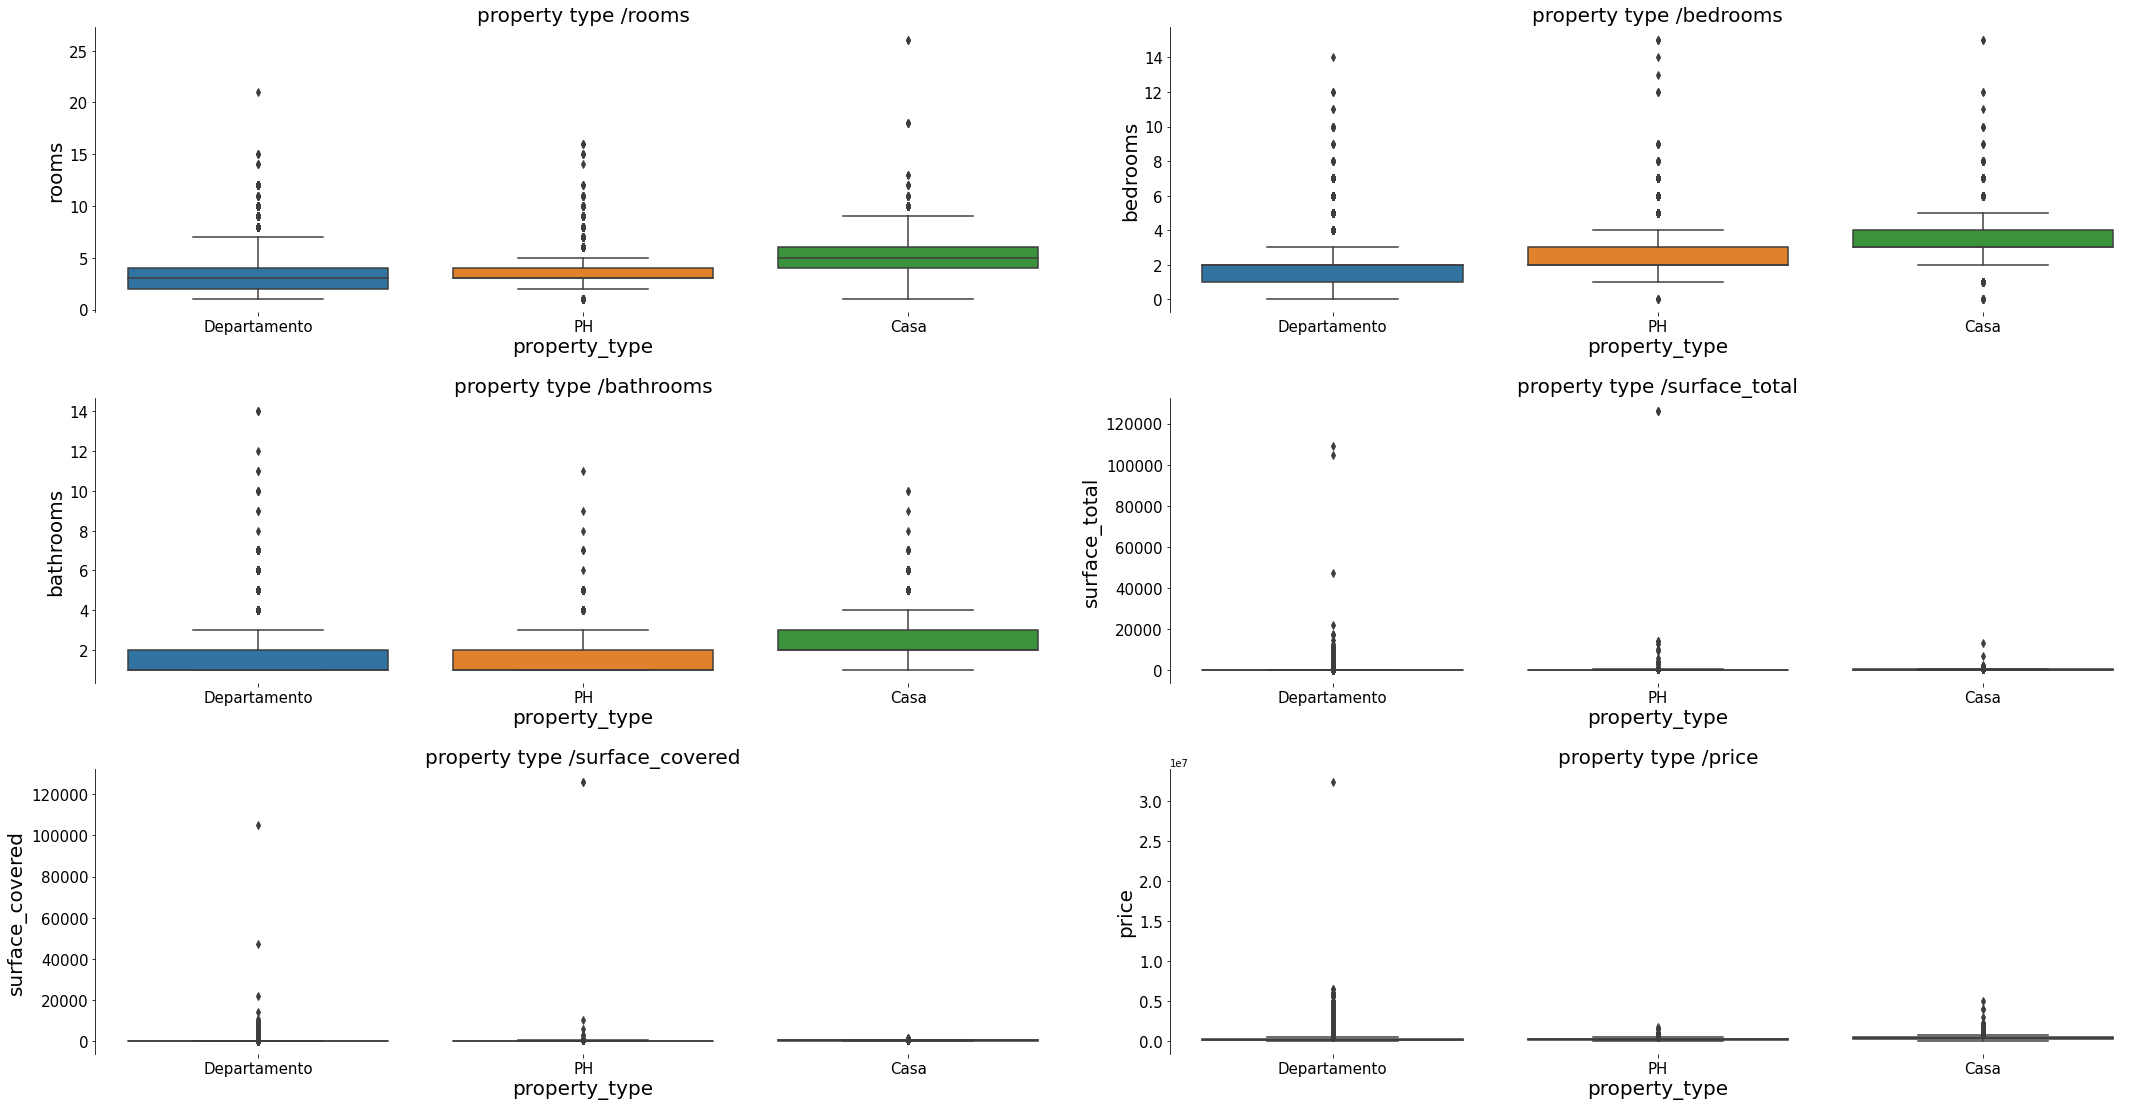

In [27]:
#Defino la figura para los dos graficos
fig = plt.figure(figsize = (30, 20))
#Agrego un gridspec para poder darle a cada grafico el tamano correpsondiente
gs = fig.add_gridspec(4, 2)

atributos=depura.columns

fila=0
columna=0
for tipo in atributos:
    if tipo!='property_type':
        ax = fig.add_subplot(gs[fila,columna])
        ax=sns.boxplot(x="property_type", y=tipo, data=depura)
        plt.setp(ax1.get_xticklabels(), rotation=90)
        titulo="property type /"+tipo
        ax.set_title(titulo,fontsize=20)
        ax.tick_params(labelsize=15)
        ax.set_xlabel("property_type",fontsize=20)
        ax.set_ylabel(tipo,fontsize=20)
        if columna<1:
            columna=columna+1
        else:
            columna=0
            fila=fila+1

#doy el formato final al grafico
sns.despine(bottom=True)
#plt.setp(fig.axes, yticks=[])
plt.tight_layout(h_pad=2)

🤔 **Outliers**  debemos encontrar un método para analizar los outliers. Podríamos hacerlo categoría por categoría pero el análisis sería muy largo y poco automático y repetible.

🔍 Buscando en internet encontramos un algoritmo que:
+ Saca el primer cuartil del dataset.
+ Saca el tercer cuartil del dataset.
+ Calcula un coeficiente IQR que básicamente resta el tercer con el primer cuartil
+ Filtra todos los elementos por debajo del primer cuartil menos el coeficiente IQR y todas las instancias sobre el tercer cuartil más un coeficiente IQR
+ A todo ese conjunto de datos los convierte en NaN


https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr

***Depuracion de Ouliers a travez de las reglas del rango intercuartilico***

In [28]:
# Calculo elcuartil #1 y el cuarti #3
minimo = depura.quantile(0.25)
maximo = depura.quantile(0.75)
# Calculo un Indice restando el cuartil 3 con el cuartil 1
IQR = maximo-minimo
#genero una mascara que traiga todos las instancias del dataset que esten por debajo del quartil 1 menos el coeficiente IQR  y por sobre el cuartil 3 mas el coeficiente IQR
clean_select = depura[~ ((depura < (minimo - 1.5 * IQR)) | (depura > (maximo + 1.5 * IQR))).any(axis=1)]

 

In [29]:
clean_select.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,79322.000000,79322.000000,77303.000000,71043.000000,70752.000000,79322.000000
mean,2.706525,1.759348,1.360827,73.397281,64.551235,185277.296286
std,1.031795,0.882996,0.578325,35.174224,29.171542,93226.425254
min,1.000000,0.000000,1.000000,12.000000,1.000000,7500.000000
25%,2.000000,1.000000,1.000000,47.000000,42.000000,115000.000000
50%,3.000000,2.000000,1.000000,65.000000,57.000000,160000.000000
75%,3.000000,2.000000,2.000000,90.000000,80.000000,235000.000000
max,7.000000,6.000000,3.000000,204.000000,174.000000,515000.000000


***Grafico el Box plot de las categorias numericas para ver como quedaron***

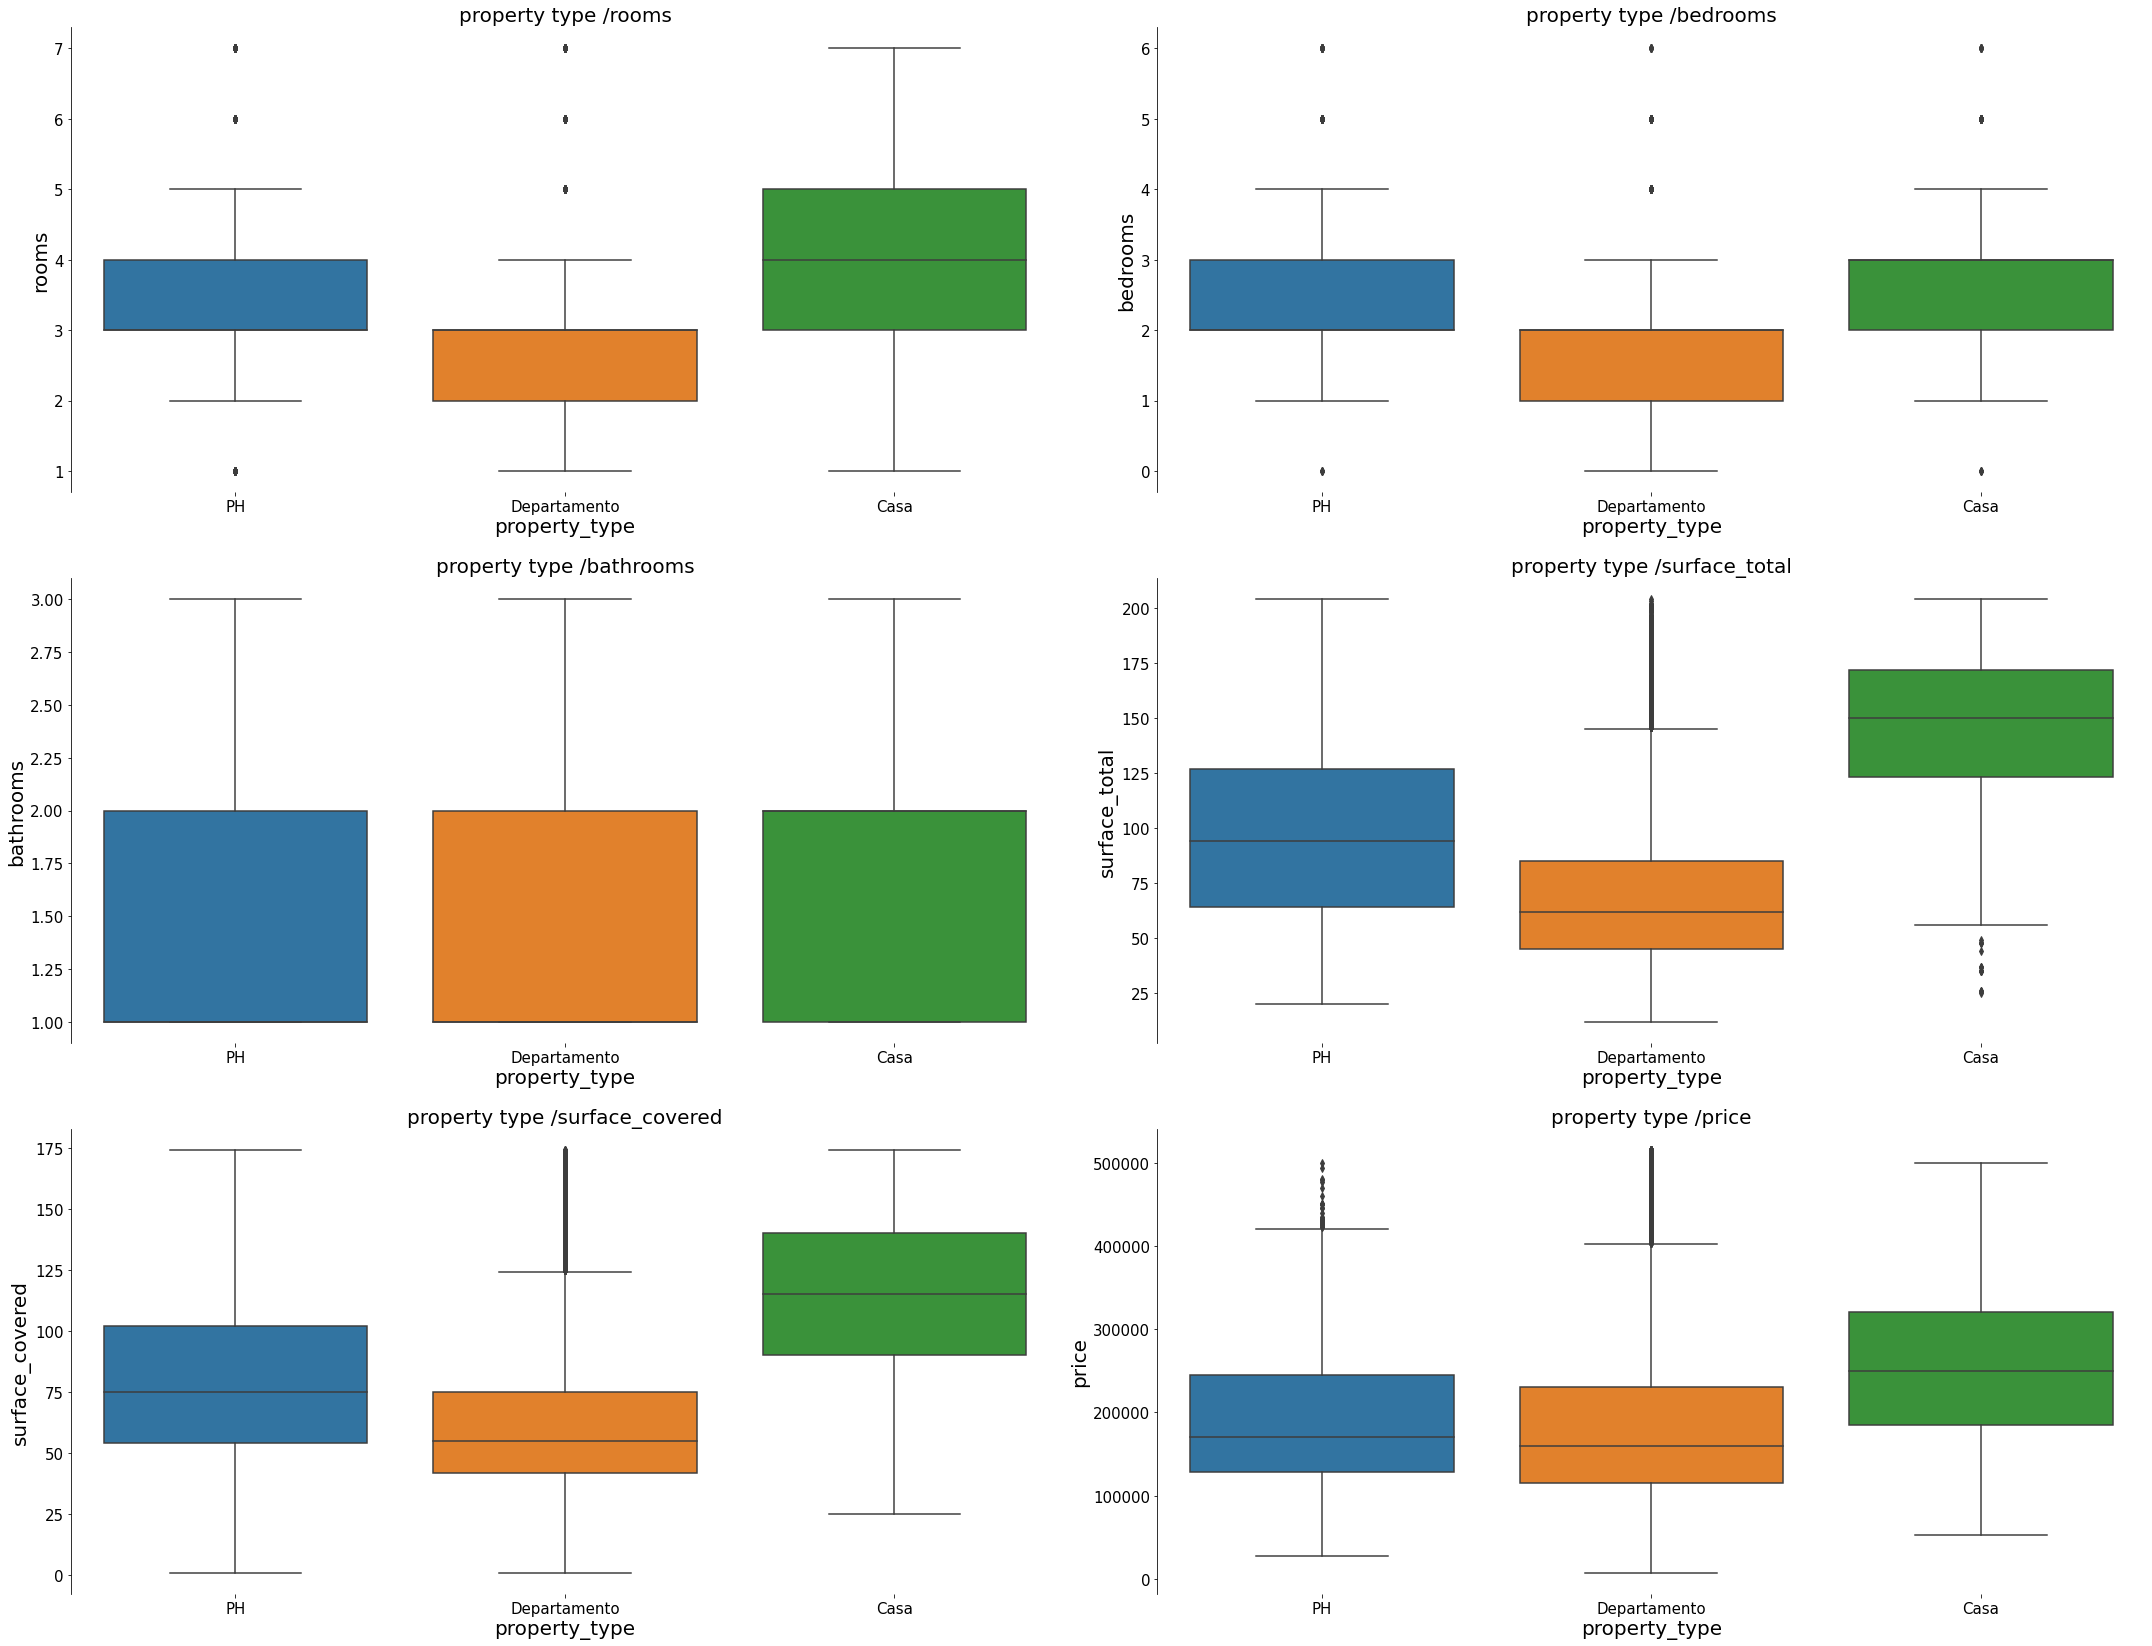

In [30]:

#Defino la figura para los dos graficos
fig = plt.figure(figsize = (30, 30))
#Agrego un gridspec para poder darle a cada grafico el tamano correpsondiente
gs = fig.add_gridspec(4, 2)

atributos=depura.columns

fila=0
columna=0
for tipo in atributos:
    if tipo!='property_type':
        ax = fig.add_subplot(gs[fila,columna])
        ax=sns.boxplot(x="property_type", y=tipo, data=clean_select)
        plt.setp(ax1.get_xticklabels(), rotation=90)
        titulo="property type /"+tipo
        ax.set_title(titulo,fontsize=20)
        ax.tick_params(labelsize=15)
        ax.set_xlabel("property_type",fontsize=20)
        ax.set_ylabel(tipo,fontsize=20)
        
        if columna<1:
            columna=columna+1
        else:
            columna=0
            fila=fila+1

#doy el formato final al grafico
sns.despine(bottom=True)
#plt.setp(fig.axes, yticks=[])
plt.tight_layout(h_pad=2)

***Grafica de distribuciones ya depuradas***

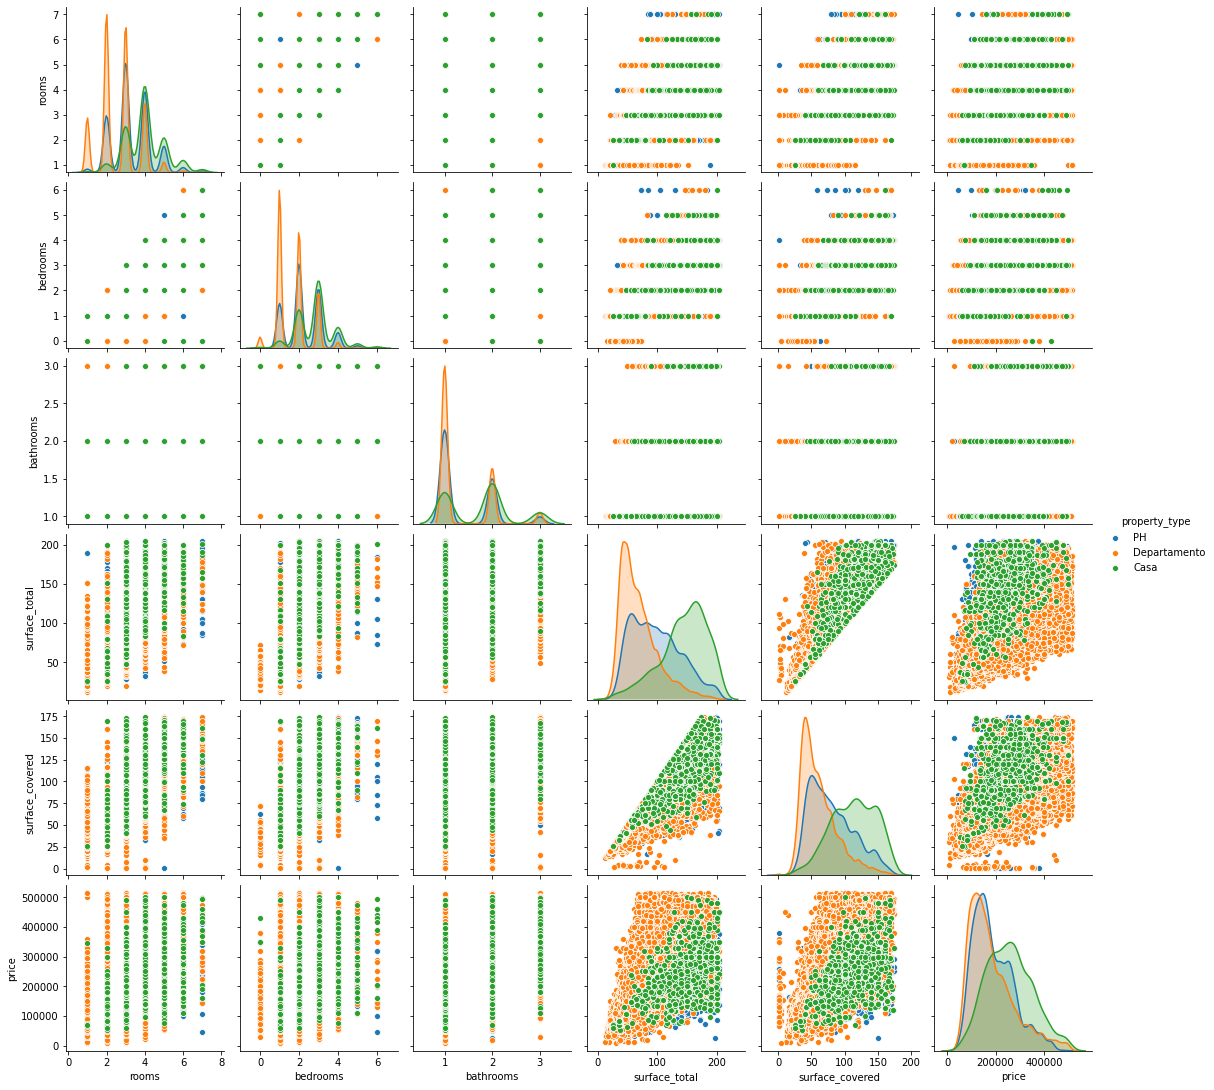

In [31]:
 sns.pairplot(clean_select, hue="property_type")

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

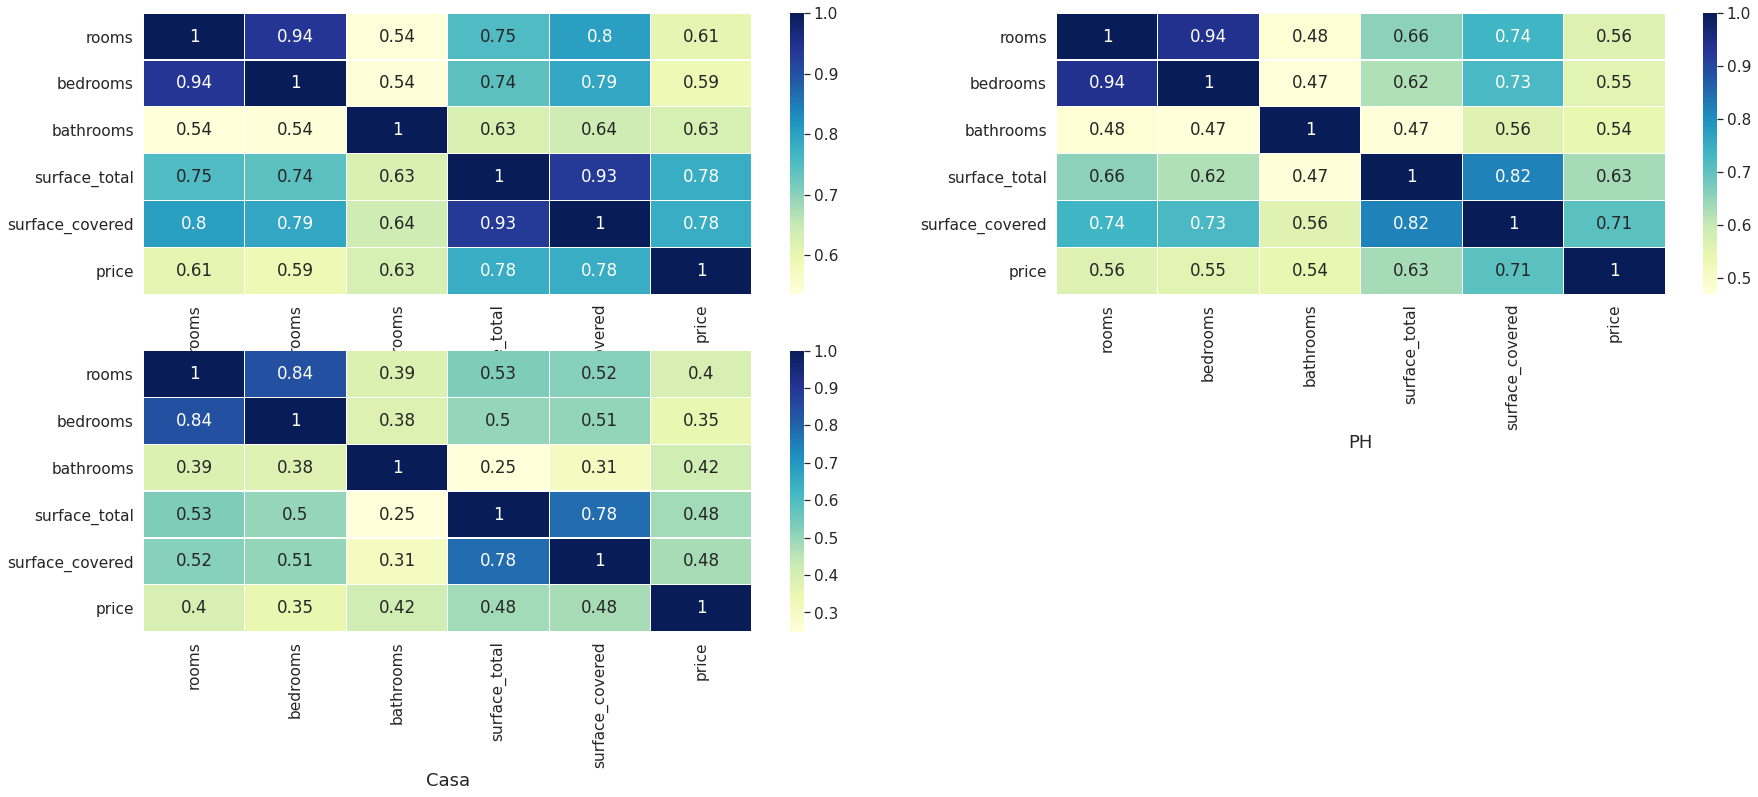

In [32]:
tipos=['Departamento', 'PH', 'Casa']
fig2 = plt.figure(figsize = (30, 30))
spec2 = gridspec.GridSpec(ncols=2, nrows=5, figure=fig2)


fila=0;
columna=0;
for tipo in tipos:
  
    #f, ax = plt.subplots(figsize=(8, 5))
    try:
        sns.set(font_scale=1.4)
        corr = clean_select[clean_select.property_type==tipo].corr()
        ax= fig2.add_subplot(spec2[fila, columna])
        ax=sns.heatmap(corr,annot=True,linewidths=.2,cmap="YlGnBu")
        ax.set_xlabel(tipo,fontsize = 18)
    except ValueError:
         print("")
    if columna<1:
        columna+=1
    else:
        fila+=1
        columna=0
  

****análisis de las matrices correlación por tipo de propiedad****

+ <strong>Departamentos:</strong> en el caso de este tipo de propiedad seleccionaría las variables <strong>surface_total y surface_covered</strong> por ser las variables que mejor correlacionan. Aunque tambien podría tener en cuenta bathroom que si bien correlaciona menos que las otras dos tiene un buen valor respecto del resto
+ <strong>PH:</strong> en el caso de este tipo de propiedad seleccionaría <strong>surface_total y surface_covered</strong>.
+ <strong>Casa:</strong> en el caso de este tipo de propiedad seleccionaría <strong>surface_total, surface_covered y bathrooms</strong> por ser las dos variables que mejor correlacionan.

En general las variables que mejor correlacionan para el cálculo de precio son:

1. surface_covered.
2. surface_total
3. bathrooms.


### 2.1 Desafío

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento` en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81021 instacias y 6 columnas.

In [33]:
data_ml=pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

data_ml.shape

(146660, 19)

In [34]:
data_ml=data_ml[data_ml.property_type.isin(['Departamento','PH','Casa']) & (data_ml.l2=='Capital Federal')]
data_ml.shape

(91485, 19)

In [35]:
data_ml=data_ml[(data_ml.surface_total<1000)&(data_ml.surface_total>15)]
data_ml.shape

(82392, 19)

In [36]:
data_ml=data_ml[data_ml.price<4000000]
data_ml.shape

(82347, 19)

In [37]:
data_ml=data_ml[['property_type','rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price']] 
data_ml.shape

(82347, 7)

In [38]:
data_ml=data_ml.dropna()
data_ml.shape

(80993, 7)

In [39]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80993 entries, 0 to 146558
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    80993 non-null  object 
 1   rooms            80993 non-null  float64
 2   bedrooms         80993 non-null  float64
 3   bathrooms        80993 non-null  float64
 4   surface_total    80993 non-null  float64
 5   surface_covered  80993 non-null  float64
 6   price            80993 non-null  float64
dtypes: float64(6), object(1)
memory usage: 4.9+ MB


#### Selecciono solamente las propiedades del tipo departamento

Dado que la consigna nos pide que trabajemos en el modelo de predicción solo para las propiedades de este tipo

In [40]:
data_ml=data_ml[data_ml.property_type=='Departamento']

⚒️Analizo con una grafica de correlacion la correlacion lineal de cada variable

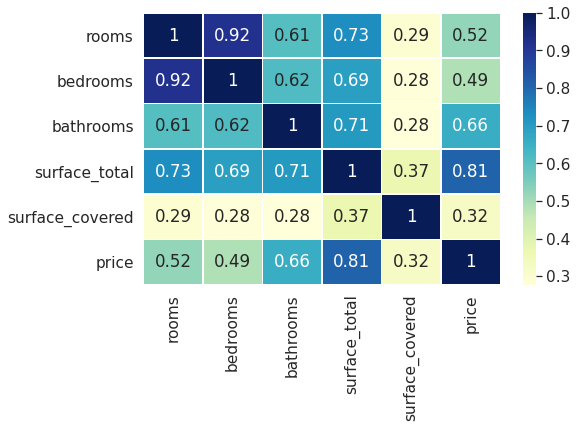

In [41]:
f, ax = plt.subplots(figsize=(8, 5))
corr = data_ml.corr()
sns.heatmap(corr,annot=True,linewidths=.5,cmap="YlGnBu")

⚒️ ***Preparo las variables a evaluar***




In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split

In [43]:

y=data_ml['price'].values
x1=data_ml[['surface_total']].values.T
x2=data_ml[['bathrooms']].values.T

Creo una función que me permita pasarle las variables que quiero evaluar y me devuelva la evaluación en ambos modelos

In [44]:
def test_modelo(modelo,profundidad_arbol=2,cantidad_vecinos=1):
    resultado=np.empty([2, 4])
    X = modelo
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    tree_regressor = DecisionTreeRegressor(max_depth=profundidad_arbol, random_state=100)
    knn_regressor = KNeighborsRegressor(n_neighbors=cantidad_vecinos, weights='distance',algorithm='auto',p=1)
    tree_regressor.fit(X_train, y_train)
    knn_regressor.fit(X_train, y_train)
    modelos = [ 'Árbol de Decisión', 'Vecinos más cercanos']
    for i, model in enumerate([tree_regressor, knn_regressor]):
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

      
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

        if rmse_train> rmse_test:
            relacion=(rmse_test/rmse_train)*100
        else:
            relacion=(rmse_train/rmse_test) *100 
        dif=abs(rmse_train-rmse_test)
        print('--------------------------')
        print(f'Modelo: {modelos[i]}')
        print(f'RMSE Train: {rmse_train}')
        print(f'RMSE Test: {rmse_test}')
        print(f'Diferencia RMSE: {dif}')
        print('--------------------------')
        
        plt.figure(figsize = (8,4))

        plt.subplot(1,2,1)
        sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
        sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
        plt.xlabel('errores')
        plt.legend()

        ax = plt.subplot(1,2,2)
        ax.scatter(y_test,y_test_pred, s =2)    
        lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
        ]

        ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
        plt.xlabel('y (test)')
        plt.ylabel('y_pred (test)')

        plt.tight_layout()
        plt.show()
        

        
    

### Evaluación de los modelos

1. ***Evaluacion de un modelo simple*** 


--------------------------
Modelo: Árbol de Decisión
RMSE Train: 192349.50762333223
RMSE Test: 183823.79412950214
Diferencia RMSE: 8525.713493830088
--------------------------


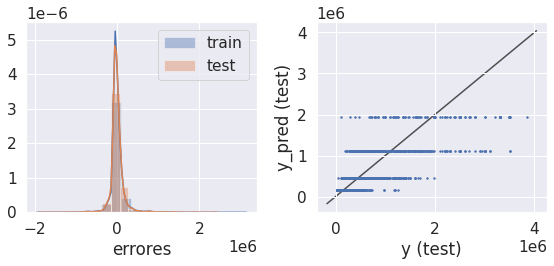

--------------------------
Modelo: Vecinos más cercanos
RMSE Train: 197326.86960409014
RMSE Test: 190849.65622748504
Diferencia RMSE: 6477.213376605097
--------------------------


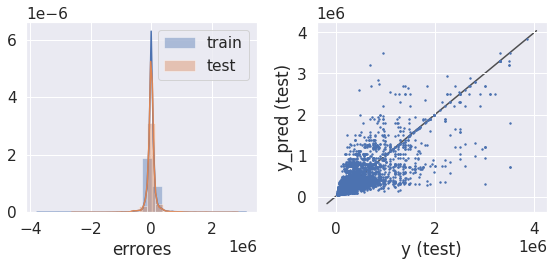

In [45]:
test_modelo(np.vstack((x1)).T,profundidad_arbol=2,cantidad_vecinos=1)


***Conclusion:** Entrenando un modelo simple con hipeparametros por defecto el modelo de vecinos mas cercanos  reduce mejor el RMSE

2. ***Modelo con Hiperparametros fijos***

Vamos a probar variando los hiperparametros manualmente a ver como se comportan ambos modelos

--------------------------
Modelo: Árbol de Decisión
RMSE Train: 172205.2920982611
RMSE Test: 164276.90567911827
Diferencia RMSE: 7928.386419142829
--------------------------


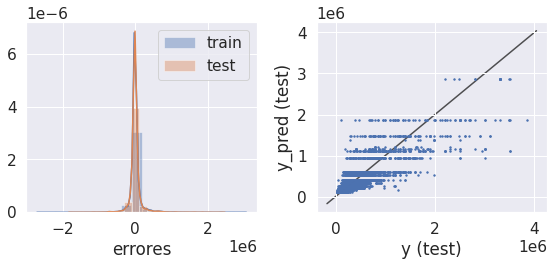

--------------------------
Modelo: Vecinos más cercanos
RMSE Train: 165974.777966752
RMSE Test: 166321.52051697005
Diferencia RMSE: 346.7425502180413
--------------------------


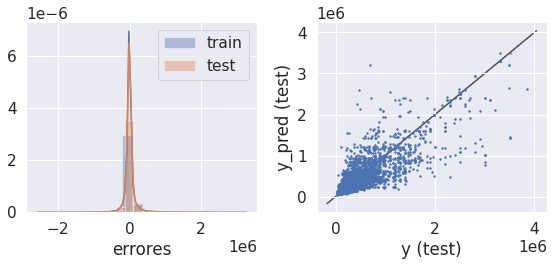

In [46]:
test_modelo(np.vstack((x1)).T,4,4) # profundidad arbol=4 y canticad de vecinos =4

--------------------------
Modelo: Árbol de Decisión
RMSE Train: 157902.33394587788
RMSE Test: 153715.77126741983
Diferencia RMSE: 4186.562678458053
--------------------------


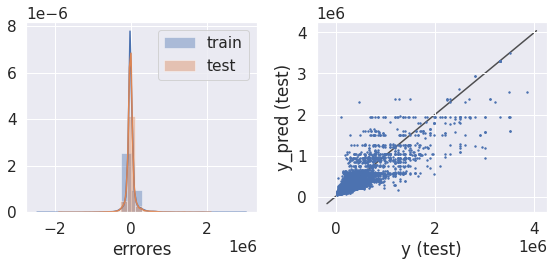

--------------------------
Modelo: Vecinos más cercanos
RMSE Train: 156406.8619497548
RMSE Test: 159027.83409339475
Diferencia RMSE: 2620.972143639956
--------------------------


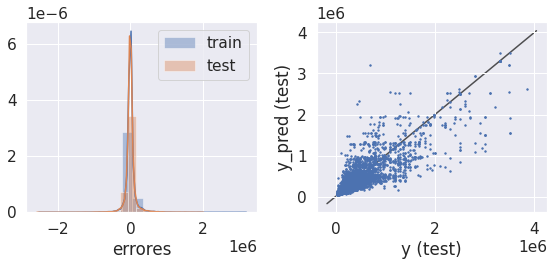

In [47]:
test_modelo(np.vstack((x1)).T,8,8) # profundidad arbol=8 y canticad de vecinos =8

--------------------------
Modelo: Árbol de Decisión
RMSE Train: 153019.7191798557
RMSE Test: 153269.97167949183
Diferencia RMSE: 250.25249963614624
--------------------------


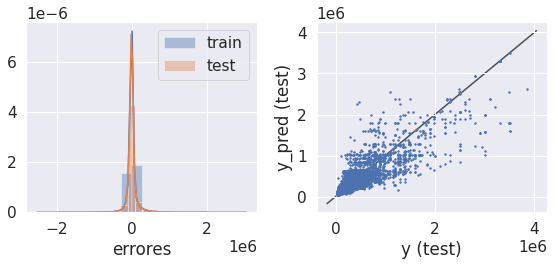

--------------------------
Modelo: Vecinos más cercanos
RMSE Train: 154403.89115514647
RMSE Test: 156637.84036106014
Diferencia RMSE: 2233.9492059136683
--------------------------


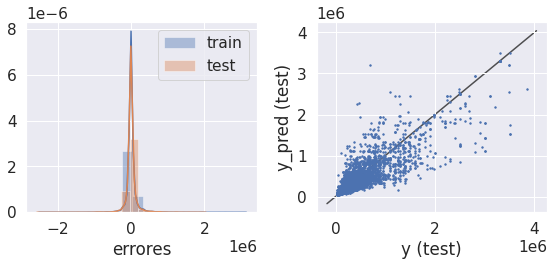

In [48]:
test_modelo(np.vstack((x1).T),12,12) # profundidad arbol=12y canticad de vecinos =12

***Conclusion modelos con parametros fijos*** Al jugar con hiperparametros fijos se ve que con hiperparametros bajos el modelo de vecinos mas cercanos predice mejor pero al incrementar los vecincos y las hojas del arbol de desicion el modelo que mejor se comporta es el de arboles de desicion

### Análisis del N adecuado

Vamos a buscar el N  mas adecuado para cada modelo. Para eso haremos un benchmark entre ambos.

In [49]:
def benchmark(X):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    size=[]
    rmse_knn_test=[]
    rmse_knn_train=[]
    rmse_diff_knn=[]

    rmse_tree_test=[]
    rmse_tree_train=[]
    rmse_diff_tree=[]

    valores=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    n_mejor=10 
    for n in valores :
        size.append(n)

        knn_regressor = KNeighborsRegressor(n_neighbors=n, weights='distance',algorithm='auto',p=1)
        knn_regressor.fit(X_train, y_train)
        y_train_pred_knn =knn_regressor.predict(X_train)
        y_test_pred_knn = knn_regressor.predict(X_test)
        rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
        rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))   


        tree_regressor = DecisionTreeRegressor(max_depth=n, random_state=100)
        tree_regressor.fit(X_train, y_train)
        y_train_pred_tree =tree_regressor.predict(X_train)
        y_test_pred_tree = tree_regressor.predict(X_test)
        rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
        rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))   


        dif_tree=rmse_test_tree-rmse_train_tree
        rmse_tree_test.append(round(rmse_test_tree,2))
        rmse_tree_train.append(round(rmse_train_tree,2))
        rmse_diff_tree.append(round(dif_tree,2))

        dif_knn=rmse_test_knn-rmse_train_knn
        rmse_knn_test.append(round(rmse_test_knn,2))
        rmse_knn_train.append(round(rmse_train_knn,2))
        rmse_diff_knn.append(round(dif_knn,2))




    data=pd.DataFrame({'N':size,'knn_train':rmse_knn_train, 'knn_test':rmse_knn_test,'diff_knn':rmse_diff_knn,'tree_train':rmse_tree_train, 'tree_test':rmse_tree_test,'diff_tree':rmse_diff_tree})

    f, ax = plt.subplots(figsize=(20, 10))
    ax1=sns.lineplot(x = "N", y = "knn_train", data = data,marker="o",linestyle=":")
    ax1=sns.lineplot(x = "N", y = "knn_test", data = data,marker="o",linestyle=":")
    ax2=sns.lineplot(x = "N", y = "tree_train", data = data,marker="X",linestyle='dashdot',linewidth=3)
    ax3=sns.lineplot(x = "N", y = "tree_test", data = data,marker="X",linestyle='dashdot',linewidth=3)

    ax1.legend(["knn train","knn test","tree train","tree_test"])

    plt.title("RMSE test vs  RMSE train ", fontsize = 12)

    plt.xlabel("N", fontsize = 15)
    plt.ylabel("RMSE", fontsize = 15)
    plt.show()
    print(data)

    


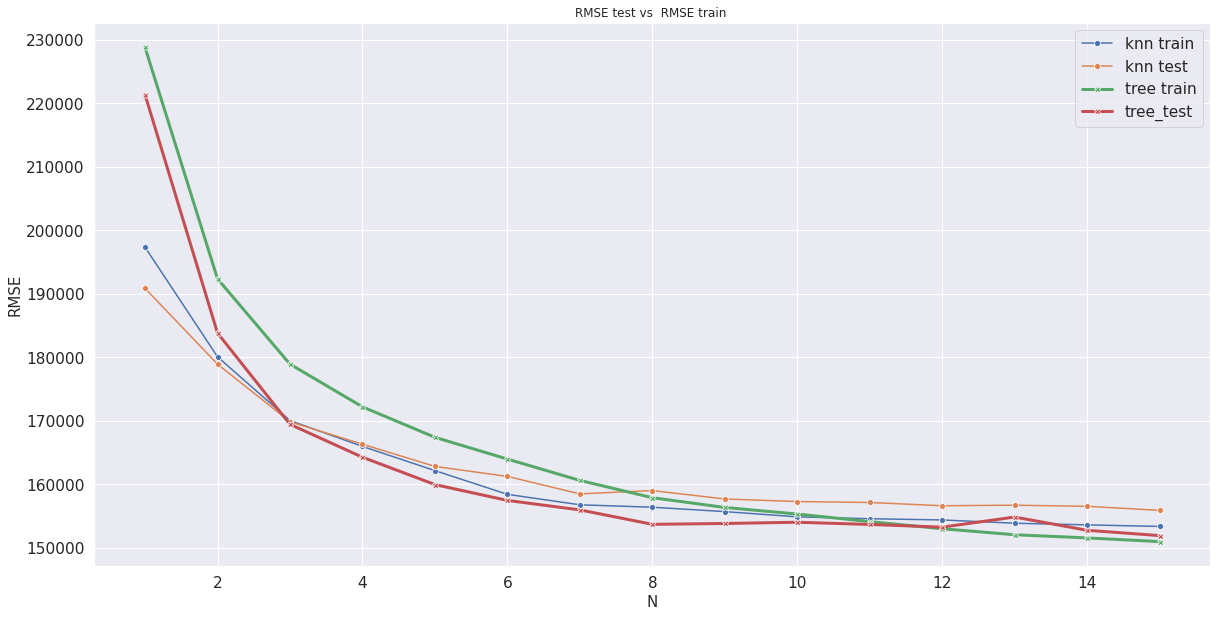

     N  knn_train   knn_test  diff_knn  tree_train  tree_test  diff_tree
0    1  197326.87  190849.66  -6477.21   228773.33  221320.26   -7453.06
1    2  180079.99  178921.09  -1158.90   192349.51  183823.79   -8525.71
2    3  170049.99  169855.69   -194.31   178923.32  169449.27   -9474.04
3    4  165974.78  166321.52    346.74   172205.29  164276.91   -7928.39
4    5  162169.95  162830.53    660.58   167409.56  159970.37   -7439.19
5    6  158433.60  161254.96   2821.36   163985.36  157475.95   -6509.41
6    7  156788.38  158506.07   1717.68   160622.28  155984.90   -4637.38
7    8  156406.86  159027.83   2620.97   157902.33  153715.77   -4186.56
8    9  155716.69  157705.54   1988.85   156370.97  153846.78   -2524.19
9   10  154891.37  157297.75   2406.38   155329.26  154042.55   -1286.70
10  11  154595.09  157152.86   2557.77   154141.72  153695.07    -446.65
11  12  154403.89  156637.84   2233.95   153019.72  153269.97     250.25
12  13  153889.34  156725.18   2835.84   152074.66 

In [50]:
X=np.vstack((x1)).T
benchmark(X)

***Conclusion:*** El modelo que mejor predice es  el arbol de desicion con 12 niveles. Si bien vecinos mas cercanos predice bien con un N=5 el RMSE logrado es mayor al de arboles dedesicion.

### Hacemos el modelo mas complejo
Incorporamos la segunda variable que mejor correlaciona <strong>bathrooms</strong> y vemos que resultado nos da respecto del otro

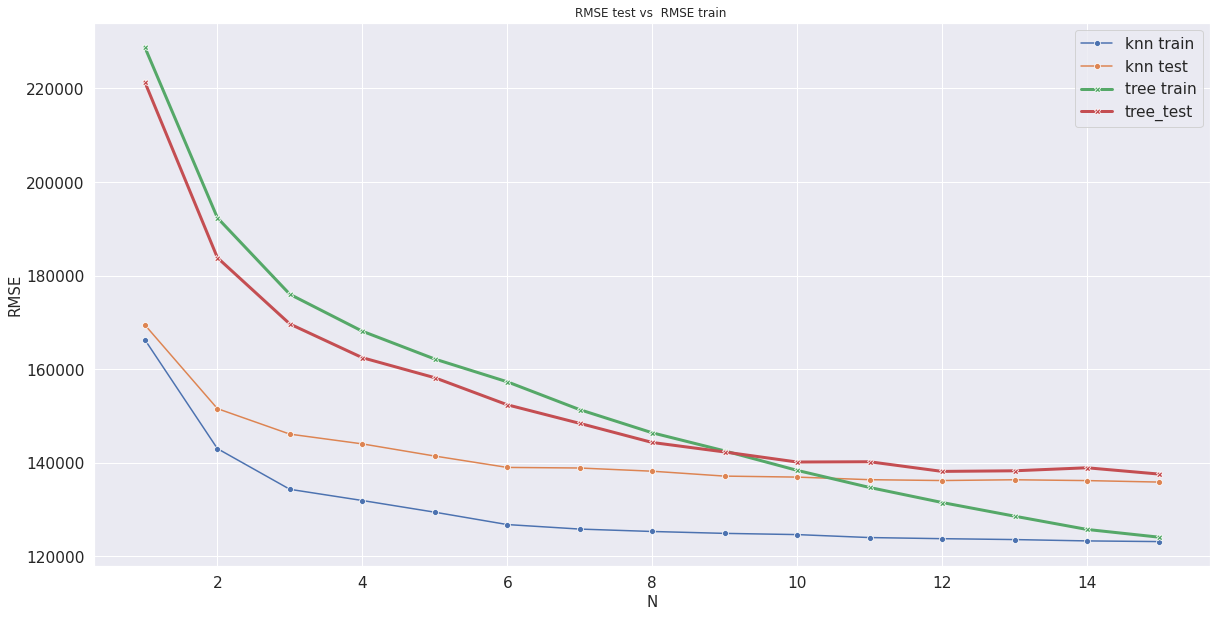

     N  knn_train   knn_test  diff_knn  tree_train  tree_test  diff_tree
0    1  166274.55  169440.99   3166.44   228773.33  221320.26   -7453.06
1    2  143008.95  151557.89   8548.94   192349.51  183823.79   -8525.71
2    3  134307.52  146103.90  11796.38   175994.10  169649.00   -6345.10
3    4  131915.95  144019.32  12103.37   168103.66  162447.86   -5655.80
4    5  129418.24  141418.98  12000.74   162156.72  158161.20   -3995.53
5    6  126773.81  138988.87  12215.06   157291.75  152380.41   -4911.33
6    7  125809.58  138863.99  13054.41   151340.48  148408.45   -2932.03
7    8  125294.17  138179.54  12885.36   146395.25  144323.99   -2071.26
8    9  124890.71  137131.76  12241.05   142520.12  142290.86    -229.26
9   10  124630.31  136919.39  12289.07   138360.32  140142.11    1781.79
10  11  123995.60  136368.81  12373.21   134701.96  140197.98    5496.03
11  12  123757.02  136186.73  12429.71   131488.95  138138.39    6649.44
12  13  123566.05  136350.80  12784.76   128569.27 

In [51]:
X=np.vstack((x1,x2)).T
benchmark(X)

***Conclusión:***  Luego de hacer el benchmark de los dos modelos con una y dos variables el modelo que mejor se comporta es el de arbol de desicion con una sola variable <strong>surface_total</strong>. Porque es el modelo que mejor reduce el RMSE.

### Conclusion del modelo seleccionado

1. <strong> Modelo seleccionado:</strong> De los dos modelos comparados el modelo que mejor se comporta es el de árboles de decisión porque es el que mejor reduce la diferencia del RMSE entre el test y el train.
2. <strong>Variables seleccionadas para el modelo</strong> La variable que elegimos es <strong>surface_total</strong>que es la que mejor correlaciona con el precio. Si bien probamos con un modelo más complejo de dos variables agregando <strong>bathrooms</strong> la perfomance y el resultado del modelo no fue bueno respecto del anterior.
3. <strong>Métrica seleccionada</strong> se seleccionó el RMSE porque la función a predecir es una función lineal y lo que buscamos evaluar es el punto que mejor reduce la distancia del  valor predicho al valore real.


6. <strong> Consideraciones respecto del modelo </strong> Respecto de los datos del dataframe. Se ven fuertemente inclinados hacia propiedades del tipo "departamentos" y sobre todo a propiedades ubicadas en zonas costosas de la ciudad de Buenos aires como "Palermo" esto sin duda debe influenciar los precios de las propiedades y el tipo de propiedades. Claramente en esta zona habrá menos lotes y casas de campos y más Departamentos, PH y Casas. Considero que la estimación que hace el modelo está un poco sesgada por estas características de los datos. Es decir, si tuviéramos que utilizar este modelo para estimar el costo de propiedades ya dentro de la provincia de buenos aires o en otra provincia del país seguramente el valor arrojado nos daría un precio superior al del mercado